In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, leastsq
import glob

# plt.rcParams['figure.figsize'] = (18, 10)

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [4]:
def data_fwhm():
    plt.xlabel("Temperatur [K]")
    # plt.ylabel("FWHM [kHz]")
    plt.ylabel("FWHM [kHz]")
    plt.title("FWHM")
    spekhome = "/home/karajan/uni/master/analyse/data/crn/data/SPEK/"
    file_names = [
                  spekhome + "spek_230K_280K.data",
                  spekhome + "spek_270K_330K.data",
                  spekhome + "spek_300K_310K.data",
                  spekhome + "spek_310K_355K.data",
                  spekhome + "spek_342K_380K.data",
                  spekhome + "spek_360K_440K.data",
                  spekhome + "spek_305K_345K.data",
                 ]
    labels = [
              "Messung 1",
              "Lehrstuhlv 2",
              "F2 Suche",
              " ",
              "Lehrstuhlv 1",
              "Hochtemperatur",
              "Pulslängenabh. Spektren",
             ]
    temp_all = np.empty(0)
    gamma_all = np.empty(0)
    for i, file_name in enumerate(file_names):
        data = np.loadtxt(file_name)
        temp = data[:,1]
        gamma = data[:,5] * 2
        gamma_err = data[:,6] * 2

        # plt.errorbar(temp, gamma, yerr=gamma_err, fmt='.')
        temp_all = np.append(temp_all, temp)
        gamma_all = np.append(gamma_all, gamma)

    return temp_all, gamma_all


def data_t1():
    fn_extern = "/home/karajan/uni/master/analyse/data/crn/data/T1/t1-zuern.data"
    labels_extern = "Zürn T1"
    data_z = np.loadtxt(fn_extern)
    temp_z = data_z[:,0]
    t1_z = data_z[:,1]
    # plot_data(temp, 1/t1, label=labels_extern[i], marker=".")
    # plt.scatter(temp_z, 1/t1_z, label=labels_extern, marker=".", color="y")


    # t1dir = "/home/jens/Documents/projekte/crn/data/T1"
    # for i, file_name in enumerate(sorted(glob.glob(t1dir + "/*.data"))):
    t1home = "/home/karajan/uni/master/analyse/data/crn/data/T1/"
    t1dir = [
            t1home + "t1_230K_280K.data",
            t1home + "t1_280K_290K.data",
            t1home + "t1_300K_310K.data",
            t1home + "t1_310K_355K.data",
            t1home + "t1_342K_380K.data",
            t1home + "t1_360K_440K_170807.data",
            t1home + "t1_270K_330K.data",
            t1home + "t1_305K_345K.data",
            t1home + "t1_305K_325K.data",
            ]
    for i, file_name in enumerate(t1dir):
        data = np.loadtxt(file_name)
        temp = data[:,1]
        t1 = data[:,3]
        t1_err = data[:,4]

        # plt.errorbar(temp, 1/t1, yerr=t1_err/t1**2, fmt='x')
        
    return temp_z, 1/t1_z


def data_maxima():
    # plt.xlabel("Temperatur [K]")
    # plt.ylabel("Maximum [kHz]")
    # plt.title("Spektren")
    spekhome = "/home/karajan/uni/master/analyse/data/crn/data/SPEK/"
    file_names = [
                  spekhome + "spek_230K_280K.data",
                  spekhome + "spek_270K_330K.data",
                  spekhome + "spek_300K_310K.data",
                  spekhome + "spek_310K_355K.data",
                  spekhome + "spek_342K_380K.data",
                  spekhome + "spek_360K_440K.data",
                  spekhome + "spek_305K_345K.data",
                 ]
    labels = [
              "Messung 1",
              "Lehrstuhlv 2",
              "F2 Suche",
              " ",
              "Lehrstuhlv 1",
              "Hochtemperatur",
              "Pulslängenabh. Spektren",
             ]
    
    temp_all = np.empty(0)
    gamma_all = np.empty(0)
    for i, file_name in enumerate(file_names):
        data = np.loadtxt(file_name)
        temp = data[:,1]
        gamma = data[:,7] * 2
        gamma_err = data[:,8] * 2

        # plt.errorbar(temp, gamma, yerr=gamma_err, fmt='.')
        
        temp_all = np.append(temp_all, temp)
        gamma_all = np.append(gamma_all, gamma)
    
    return temp_all, gamma_all

In [5]:
def get_fwhm_temp_t1():
    t1_dir = "/home/karajan/uni/master/analyse/data/"
    t1_fn = [
        t1_dir + "170828/T1/T1_170828.data",
        t1_dir + "170807/T1/T1_170807.data",
        t1_dir + "170731/T1/T1_170731.data",
        t1_dir + "170906/T1/T1_170906.data",
        t1_dir + "170912/T1/T1_170912.data",
        t1_dir + "170918/T1/T1_170918.data",
        t1_dir + "170710/T1/T1_170710.data",
        t1_dir + "170713/T1/T1_170713.data",
        t1_dir + "170706/T1/T1_170706.data",
        t1_dir + "170817/T1/T1_170817.data",
    ]
    t1temps = np.empty(0)
    t1t1 = np.empty(0)
    for fn in t1_fn:
        data = np.loadtxt(fn)
        t1temps = np.hstack([t1temps, data[:, 1]])
        t1t1 = np.hstack([t1t1, data[:, 3]])

    t1temps, t1t1 = data_t1()
    t1t1 = 1/t1t1

    spek_dir = "/home/karajan/uni/master/analyse/data/crn/data/SPEK/"
    spek_fn = [
        spek_dir + "spek_230K_280K.data",
        spek_dir + "spek_270K_330K.data",
        spek_dir + "spek_300K_310K.data",
        spek_dir + "spek_310K_355K.data",
        spek_dir + "spek_342K_380K.data",
        spek_dir + "spek_360K_440K.data",
        spek_dir + "spek_305K_345K.data",
    ]
    spektemps = np.empty(0)
    spekfwhm = np.empty(0)
    for fn in spek_fn:
        data = np.loadtxt(fn)
        spektemps = np.hstack([spektemps, data[:, 1]])
        spekfwhm = np.hstack([spekfwhm, data[:, 5] * 2])

    # beste T1 Temperatur finden
    spekt1 = np.empty(len(spektemps))
    for i, temp in enumerate(spektemps):
        tempindex = np.argmin(np.abs(t1temps - temp))
        spekt1[i] = t1t1[tempindex]

    spekfwhm_t1 = spekfwhm - 1/spekt1/np.pi
    return spektemps, spekfwhm, spekt1, spekfwhm_t1


def get_fwhm_temp_t1_2():
    homedir = "/home/karajan/uni/master/ma/analyse/data/crn/data/"

    fwhm_data = np.loadtxt(homedir + "SPEK/spek_342K_380K.data")
    temp_f = fwhm_data[:, 1]
    gamma = fwhm_data[:, 5]

    t1_data = np.loadtxt(homedir + "T1/t1_342K_380K.data")
    t1 = t1_data[:, 3]
    t1err = t1_data[:, 4]

    fwhm_data2 = np.loadtxt(homedir + "SPEK/spek_360K_440K.data")
    temp_f2 = fwhm_data2[:, 1]
    gamma2 = fwhm_data2[:, 5]

    t1_data2 = np.loadtxt(homedir + "T1/t1_360K_440K_170807.data")
    t1_data2 = np.loadtxt(homedir + "T1/T1_170807_betafest.data")
    t12 = t1_data2[:, 3]
    t12err = t1_data2[:, 4]

    # return (np.hstack([temp_f, temp_f2[6:]]),
    #        np.hstack([(gamma - 1 / t1[1::2] / 2 / np.pi) * 2, (gamma2[6:] - 1 / t12[6:] / 2 / np.pi) * 2]),
    #        np.hstack([t1[1::2], t12[6:]]),
    #        np.hstack([t1err[1::2], t12err[6:]]))
    return (np.hstack([temp_f, temp_f2]),
            np.hstack([(gamma - 1 / t1[1::2] / 2 / np.pi) * 2,
                       (gamma2 - 1 / t12 / 2 / np.pi) * 2]),
            np.hstack([t1[1::2], t12]),
            np.hstack([t1err[1::2], t12err]))


def data_t1():
    fn_extern = "/home/karajan/uni/master/analyse/data/crn/data/T1/t1-zuern.data"
    labels_extern = "Zürn T1"
    data_z = np.loadtxt(fn_extern)
    temp_z = data_z[:,0]
    t1_z = data_z[:,1]
    # plot_data(temp, 1/t1, label=labels_extern[i], marker=".")
    # plt.scatter(temp_z, 1/t1_z, label=labels_extern, marker=".", color="y")


    # t1dir = "/home/jens/Documents/projekte/crn/data/T1"
    # for i, file_name in enumerate(sorted(glob.glob(t1dir + "/*.data"))):
    t1_dir = "/home/karajan/uni/master/analyse/data/"
    t1_fn = [
        t1_dir + "170828/T1/T1_170828.data",
        t1_dir + "170807/T1/T1_170807.data",
        t1_dir + "170731/T1/T1_170731.data",
        t1_dir + "170906/T1/T1_170906.data",
        t1_dir + "170912/T1/T1_170912.data",
        t1_dir + "170918/T1/T1_170918.data",
        t1_dir + "170710/T1/T1_170710.data",
        t1_dir + "170713/T1/T1_170713.data",
        t1_dir + "170706/T1/T1_170706.data",
        t1_dir + "170817/T1/T1_170817.data",
    ]
    t1temps = np.empty(0)
    t1t1 = np.empty(0)
    for fn in t1_fn:
        data = np.loadtxt(fn)
        t1temps = np.hstack([t1temps, data[:, 1]])
        t1t1 = np.hstack([t1t1, data[:, 3]])

        # plt.errorbar(temp, 1/t1, yerr=t1_err/t1**2, fmt='x')
    
    return t1temps, 1/t1t1
    # return temp_z, 1/t1_z


def get_dofft_info(fn):
    maxim = 0.0
    mean = 0.0
    fwhm = 0.0
    temp = 0.0
    with open(fn, "r") as info_file:
        for line in info_file:
            if "!frequency peak:" in line:
                maxim = float(line.split(" ")[2])
            elif "!mean frequency:" in line:
                mean = float(line.split(" ")[2])
            elif "!FWHM:" in line:
                fwhm = float(line.split(" ")[-2])
            elif "!Sample Temperature" in line:
                temp = float(line.split(" ")[-2])
    return maxim, mean, fwhm, temp


def get_dofft(kind):
    home_spek = "/home/karajan/uni/master/analyse/data/"
    spek_dirs = [
        home_spek + "170706/SPEK",
        home_spek + "170713/SPEK",
        home_spek + "170731/spektren",
        home_spek + "170807/SPEK",
        home_spek + "170817/SPEK",
        home_spek + "170828/SPEK",
        home_spek + "170906/SPEK/tau15",
        home_spek + "170912/SPEK/tau_abh/tau0015",
    ]
    
    temp = np.empty(0)
    data = np.empty(0)
    for spek_dir in spek_dirs:
        fn_spek = glob.glob(spek_dir + "/*/*.spec.nmr")
        print(spek_dir)
        maxims = np.empty(len(fn_spek))
        means = np.empty(len(fn_spek))
        fwhm = np.empty(len(fn_spek))
        temps = np.empty(len(fn_spek))
        for i, fn in enumerate(fn_spek):
            maxims[i], means[i], fwhm[i], temps[i] = get_dofft_info(fn)
            
        temp = np.hstack([temp, temps])
        if kind == "fwhm":
            # plt.scatter(temps, fwhm / 1e3, marker="o")
            data = np.hstack([data, fwhm])
        elif kind == "maxim":
            # plt.scatter(temps, maxims / 1e3, marker="o")
            data = np.hstack([data, maxims])
        elif kind == "mean":
            # plt.scatter(temps, means / 1e3, marker="o")
            data = np.hstack([data, means])
    
    return temp, data


def get_lorentz():
    home_spek = "/home/karajan/uni/master/ma/analyse/data/"
    spek_fns = [
        home_spek + "crn/data/SPEK/spek_230K_280K.data",
        home_spek + "crn/data/SPEK/spek_270K_330K.data",
        home_spek + "crn/data/SPEK/spek_300K_310K.data",
        home_spek + "crn/data/SPEK/spek_305K_345K.data",
        home_spek + "crn/data/SPEK/spek_310K_355K.data",
        home_spek + "crn/data/SPEK/spek_342K_380K.data",
        home_spek + "crn/data/SPEK/spek_360K_440K.data",
    ]
    maxims = np.empty(0)
    means = np.empty(0)
    fwhms = np.empty(0)
    temps = np.empty(0)
    for spek_fn in spek_fns:
        data = np.loadtxt(spek_fn, comments="#")
        maxims = np.hstack([maxims, data[:, 7]])
        means = np.hstack([means, data[:, 7]])
        fwhms = np.hstack([fwhms, data[:, 5]])
        temps = np.hstack([temps, data[:, 1]])

    return temps, fwhms, means, maxims


def gett12():
    home_dir = "/home/karajan/uni/master/ma/analyse/data/crn/data/T1/"
    t1dir = [
        home_dir + "t1_230K_280K.data",
        home_dir + "t1_280K_290K.data",
        home_dir + "t1_300K_310K.data",
        home_dir + "t1_310K_355K.data",
        home_dir + "t1_342K_380K.data",
        home_dir + "t1_360K_440K_170807.data",
        home_dir + "t1_270K_330K.data",
        home_dir + "t1_305K_345K.data",
        home_dir + "t1_305K_325K.data",
    ]
    otemps = np.empty(0)
    ot1 = np.empty(0)
    ot1err = np.empty(0)
    obeta = np.empty(0)
    obetaerr = np.empty(0)
    for file_name in t1dir:
        data = np.loadtxt(file_name)

        otemps = np.hstack([otemps, data[:, 1]])
        ot1 = np.hstack([ot1, data[:, 3]])
        ot1err = np.hstack([ot1err, data[:, 4]])
        obeta = np.hstack([obeta, data[:, 5]])
        obetaerr = np.hstack([obetaerr, data[:, 6]])


    fn_t1betafest = home_dir + "T1_170807_betafest.data"
    data_t1_bf = np.loadtxt(fn_t1betafest)

    otemps_bf = data_t1_bf[:, 1]
    ot1_bf = data_t1_bf[:, 3]
    ot1err_bf = data_t1_bf[:, 4]
    obeta_bf = data_t1_bf[:, 5]
    obetaerr_bf = data_t1_bf[:, 6]


    cutofftemp = 390
    ot1 = ot1[otemps < cutofftemp]
    ot1err = ot1err[otemps < cutofftemp]
    obeta = obeta[otemps < cutofftemp]
    obetaerr = obetaerr[otemps < cutofftemp]
    otemps = otemps[otemps < cutofftemp]

    ot1_bf = ot1_bf[otemps_bf > cutofftemp]
    ot1err_bf = ot1err_bf[otemps_bf > cutofftemp]
    obeta_bf = obeta_bf[otemps_bf > cutofftemp]
    obetaerr_bf = obetaerr_bf[otemps_bf > cutofftemp]
    otemps_bf = otemps_bf[otemps_bf > cutofftemp]
    
    return otemps, ot1, otemps_bf, ot1_bf

In [6]:
# temp_fwhm, fwhm = data_fwhm()
# temp_t1, t1 = data_t1()
# temp_max, maxima = data_maxima()

# spektemps, spekfwhm_t1 = get_fwhm_temp_t1_2()
spektemps_2, spekfwhm_t1_2, t1, t1err = get_fwhm_temp_t1_2()
temp_fwhm = spektemps_2
fwhm = spekfwhm_t1_2
# spektemps, spekfwhm, spekt1, spekfwhm_t1 = get_fwhm_temp_t1()


# temp_t1, t1 = data_t1()
otemps, ot1, otemps_bf, ot1_bf = gett12()

temp_max, maxima = get_dofft("mean")
ltemps, lfwhms, lmeans, lmaxims = get_lorentz()

/home/karajan/uni/master/analyse/data/170706/SPEK
/home/karajan/uni/master/analyse/data/170713/SPEK
/home/karajan/uni/master/analyse/data/170731/spektren
/home/karajan/uni/master/analyse/data/170807/SPEK
/home/karajan/uni/master/analyse/data/170817/SPEK
/home/karajan/uni/master/analyse/data/170828/SPEK
/home/karajan/uni/master/analyse/data/170906/SPEK/tau15
/home/karajan/uni/master/analyse/data/170912/SPEK/tau_abh/tau0015


In [7]:
# const
# 4er Papier
D = 3.5
T_VF = 294

# Augsburg
D = 4.72
T_VF = 285

# Mauro
K = 6.93
C = 2320

omega = 2 * np.pi * 97.1722e6
eta_squared = 42 - 24 * np.sqrt(3)  # = 0.43

T = np.linspace(300, 500, 1000)

# var
tau_co = 5.1e-14
C_Q = 1.0
alpha = 0.5
gamma = 0.5


def tau_vf(T, tau_co):
    # 4er Papier
    D = 3.5
    T_VF = 294
    tau_co = 5.1e-14
    return tau_co * np.exp(D * T_VF / (T - T_VF))
    # return tau_co * np.exp(K/T * np.exp(C/T))

    
def tau_vf_aug(T, tau_co):
    # Augsburg
    D = 4.72
    T_VF = 285
    tau_co = 1.15e-14
    return tau_co * np.exp(D * T_VF / (T - T_VF))


def J(omega, C_Q, tau_c, alpha, gamma):
    return np.pi**2 / 5 * C_Q**2 * (1 + eta_squared / 3) * tau_c / (1 + omega**2 * (tau_c)**2)


def J_cc(omega, C_Q, tau, alpha, gamma):
    return 1/2 * np.pi**2 / 5 * C_Q**2 * (1 + eta_squared / 3) * 2/omega * np.sin(alpha * np.pi/2) * (omega*tau)**alpha / (1 + (omega*tau)**(2*alpha) + 2*np.cos(alpha * np.pi/2) * (omega*tau)**alpha)


def J_dc(omega, C_Q, tau, alpha, gamma):
    return 1/2 * np.pi**2 / 5 * C_Q**2 * (1 + eta_squared / 3) * 2/omega * np.sin(gamma * np.arctan(omega*tau)) / (1 + (omega*tau)**2)**(gamma/2)


def T_1(J, C_Q, tau, alpha, gamma):
    # omega = 2 * np.pi * 85.7e6
    return 1/((J(omega, C_Q, tau, alpha, gamma) + 4*J(2*omega, C_Q, tau, alpha, gamma)))


def Q(J, omega, tau_c):
    return J * omega * tau_c


def omega_c(J, C_Q, tau, alpha, gamma):
    return Q(J(2*omega, C_Q, tau, alpha, gamma), 2*omega, tau) - Q(J(omega, C_Q, tau, alpha, gamma), omega, tau)


def T_2c(J, C_Q, tau, alpha, gamma):
    return 1 / (J(omega, C_Q, tau, alpha, gamma) + J(2*omega, C_Q, tau, alpha, gamma))


def delta_c(T_2c):
    return 1 / (np.pi * T_2c)


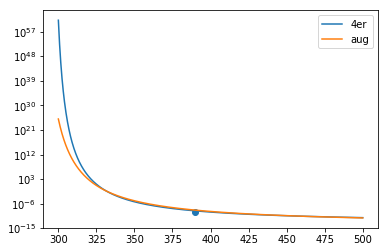

In [8]:
def tau_c_4er(T):
    tau_co = 5.1e-14
    D = 3.5
    T_VF = 294
    return tau_co * np.exp((D * T_VF) / (T - T_VF))


def tau_c_aug(T):
    tau_co = 1.15e-14
    D = 4.72
    T_VF = 285
    return tau_co * np.exp((D * T_VF) / (T - T_VF))


T = np.linspace(300, 500, 1000)

plt.yscale("log")
plt.plot(T, tau_c_4er(T), label="4er")
plt.plot(T, tau_c_aug(T), label="aug")
plt.scatter(390, 1e-9)
plt.legend()

In [11]:
def get_T1(J, tau_co, C_Q, alpha, gamma):
    tau = tau_vf(T, tau_co)
    T1 = T_1(J, C_Q, tau, alpha, gamma)
    tau2 = tau_vf_aug(T, tau_co)
    T12 = T_1(J, C_Q, tau2, alpha, gamma)
    return T1, T12


def plot_T1(T1, T12):
    plt.subplot(131)
    # plt.grid(True)
    plt.yscale("log")
    plt.scatter(otemps, 1/ot1, color="tab:blue")
    plt.scatter(otemps_bf, 1/ot1_bf, color="tab:blue")
    plt.plot(T, 1/T1, color="tab:orange")
    plt.plot(T, 1/T12, color="tab:green")
    plt.xlim(300, 450)
    plt.ylim(20, 20**5)
    plt.xlabel("Temperatur [K]")
    plt.ylabel("1/$T_1$ [1/s]")
    plt.gca().tick_params(direction="in", which="both", top=True, right=True)
    

def get_delta_c(J, tau_co, C_Q, alpha, gamma):
    tau = tau_vf(T, tau_co)
    T_2 = T_2c(J, C_Q, tau, alpha, gamma)
    delta = delta_c(T_2)
    tau2 = tau_vf_aug(T, tau_co)
    T_22 = T_2c(J, C_Q, tau2, alpha, gamma)
    delta2 = delta_c(T_22)
    return delta, delta2


def plot_delta_c(delta_c, delta_c2):
    plt.subplot(132)
    # plt.grid(True)
    plt.scatter(temp_fwhm, fwhm / 1e3)
    plt.ylim(-2, 45)
    plt.plot(T, delta_c / 1e3, color="tab:orange")
    plt.plot(T, delta_c2 / 1e3, color="tab:green")
    plt.xlim(300, 450)
    plt.xlabel("Temperatur [K]")
    plt.ylabel("Halbwertsbreite [kHz]")
    plt.gca().tick_params(direction="in", which="both", top=True, right=True)


def get_omega(J, tau_co, C_Q, alpha, gamma):
    tau = tau_vf(T, tau_co)
    om = omega_c(J, C_Q, tau, alpha, gamma)
    tau2 = tau_vf_aug(T, tau_co)
    om2 = omega_c(J, C_Q, tau2, alpha, gamma)
    return om, om2


def plot_omega(om, om2):
    plt.subplot(133)
    # plt.grid(True)
    cutofftemp = 360
    plt.scatter(temp_max[temp_max < cutofftemp], maxima[temp_max < cutofftemp] / 1e3, color="tab:blue")
    plt.scatter(ltemps[ltemps > cutofftemp], lmeans[ltemps > cutofftemp] / 1e3, color="tab:blue")
    plt.plot(T, om / 1e3, color="tab:orange")
    plt.plot(T, om2 / 1e3, color="tab:green")
    plt.xlim(300, 450)
    plt.ylim(-25, 5)
    plt.xlabel("Temperatur [K]")
    plt.ylabel("Schwerpunkt [kHz]")
    plt.gca().tick_params(direction="in", which="both", top=True, right=True)


def get_theory(tau_co, C_Q, alpha, gamma, save):
    plt.rcParams['figure.figsize'] = (9, 5)
    tau_co *= 1e-15
    T1, T12 = get_T1(J, tau_co, C_Q, alpha, gamma)
    delta_c, delta_c2 = get_delta_c(J, tau_co, C_Q, alpha, gamma)
    om, om2 = get_omega(J, tau_co, C_Q, alpha, gamma)
    
    plt.clf()
    plt.figure(1)
    plot_T1(T1, T12)
    plot_delta_c(delta_c, delta_c2)
    plot_omega(om, om2)
    
    # plt.title("$\\tau = ${:.2E}, $C_Q = ${:3.2E}, $\\alpha = ${}, $\\gamma = ${}".format(tau_co, C_Q, alpha, gamma))
    
    if save == True:
        save_plot()
    
    plt.gcf().subplots_adjust(wspace=0.3)
    plt.show()
    

def save_plot(fn=None):
    # plt.legend()
    file_types = ["pdf", "svg", "jpg"]
    fn_save = "/home/karajan/uni/master/ma/analyse/plots/SPEK3/OBI_J_01"
    plt.gcf().subplots_adjust(wspace=0.3)
    if fn is not None:
        fn_save = fn
    for file_type in file_types:
        plt.savefig(fn_save + "." + file_type, bbox_inches="tight")

In [12]:
tau_co = widgets.FloatSlider(min=5, max=100, step=5e-1, continuous_update=False)
C_Q = widgets.FloatSlider(min=1e6, max=6e6, step=5e4, continuous_update=False)
alpha = widgets.FloatSlider(min=0.1, max=2.0, step=0.02, continuous_update=False)
gamma = widgets.FloatSlider(min=0.1, max=2.0, step=0.02, continuous_update=False)
save = widgets.Checkbox(value=False)
ui = widgets.VBox([tau_co, C_Q, alpha, gamma, save])

out = widgets.interactive_output(get_theory, {'tau_co': tau_co, 'C_Q': C_Q, 'alpha': alpha, 'gamma': gamma, 'save': save})

display(ui, out)

Output()

In [15]:
w = interactive(get_theory, tau_co=(5, 500, 5e-1), C_Q=(1e6, 1e7, 5e4), alpha=(0.0, 1.0, 0.02), gamma=(0.0, 1.0, 0.02), save=False)
output = w.children[-1]
output.layout.height = '600px'
w

interactive(children=(FloatSlider(value=252.0, description='tau_co', max=500.0, min=5.0, step=0.5), FloatSlide…